In [206]:
#import islemleri
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [207]:
#veriseti okutma 3-5
df = pd.read_csv("./dataset/car.csv",encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [209]:
df.corr()[["car purchase amount"]].sort_values(["car purchase amount"])

,car purchase amount
gender,-0.066408
credit card debt,0.028882
net worth,0.488580
annual Salary,0.617862
age,0.632865
car purchase amount,1.000000


In [210]:
#eksik veri kontrolü
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [211]:
#sütunları ayarlamak
car_df = df.drop(["customer name","customer e-mail","country"],axis=1)

In [212]:
#x ve y yi tanımlamak
Y = car_df[["car purchase amount"]]
X = car_df.drop(["car purchase amount"],axis=1)

In [213]:
X.shape

(500, 5)

In [214]:
Y.shape

(500, 1)

In [215]:
#önişleme işlemleri
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
Y_scaled = mms.fit_transform(Y.values.reshape(-1,1))

In [216]:
X_scaled.shape

(500, 5)

In [217]:
Y_scaled.shape

(500, 1)

In [218]:
#test ve eğitim setini tanımlama işlemleri
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_scaled,test_size=0.25,random_state=101)

In [219]:
xtrain.shape

(375, 5)

In [220]:
ytrain.shape

(375, 1)

In [221]:
xtest.shape

(125, 5)

In [222]:
ytest.shape

(125, 1)

In [223]:
#ANN Modelimiz
import keras
from keras import layers
from keras import Model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 25)                150       
                                                                 
 dense_16 (Dense)            (None, 25)                650       
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [225]:
epochs_hist = model.fit(xtrain,ytrain,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 25ms/step - loss: 0.1471 - accuracy: 0.0000e+00 - val_loss: 0.1257 - val_accuracy: 0.0133
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.1012 - accuracy: 0.0000e+00 - val_loss: 0.0887 - val_accuracy: 0.0133
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0734 - accuracy: 0.0000e+00 - val_loss: 0.0667 - val_accuracy: 0.0133
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0583 - accuracy: 0.0033 - val_loss: 0.0518 - val_accuracy: 0.0133
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0456 - accuracy: 0.0033 - val_loss: 0.0395 - val_accuracy: 0.0133
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.0033 - val_loss: 0.0286 - val_accuracy: 0.0133
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.0033 - val_loss: 0.0199 - val_accuracy: 0.0133
Epoch 8/100
6/

In [226]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

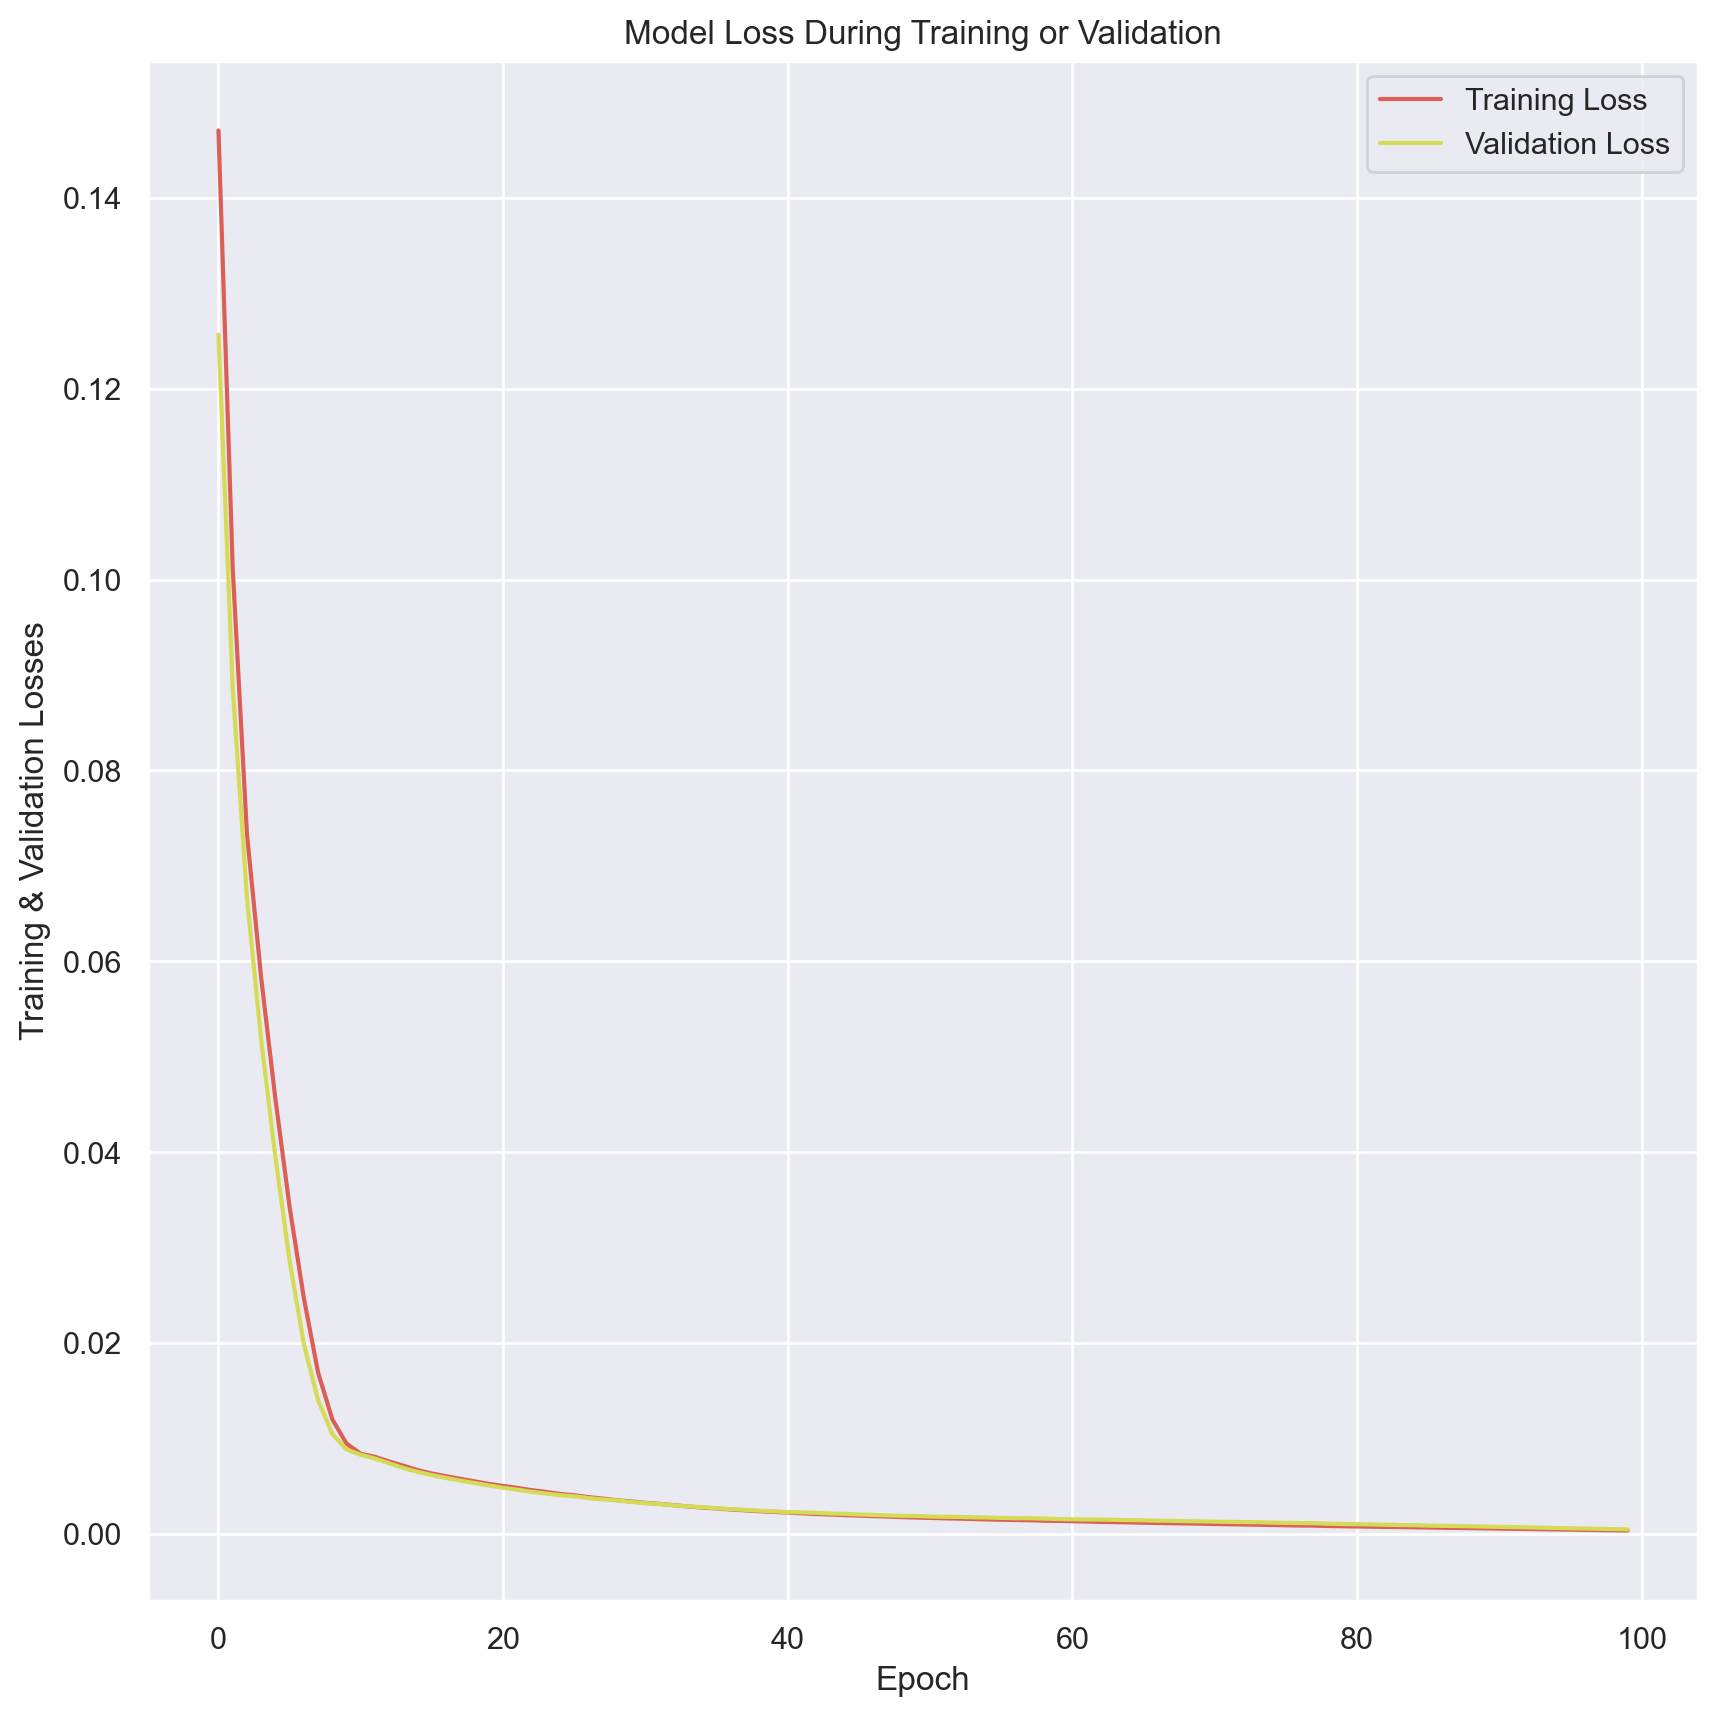

In [227]:
plt.figure(figsize=(10,10),dpi=200)
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

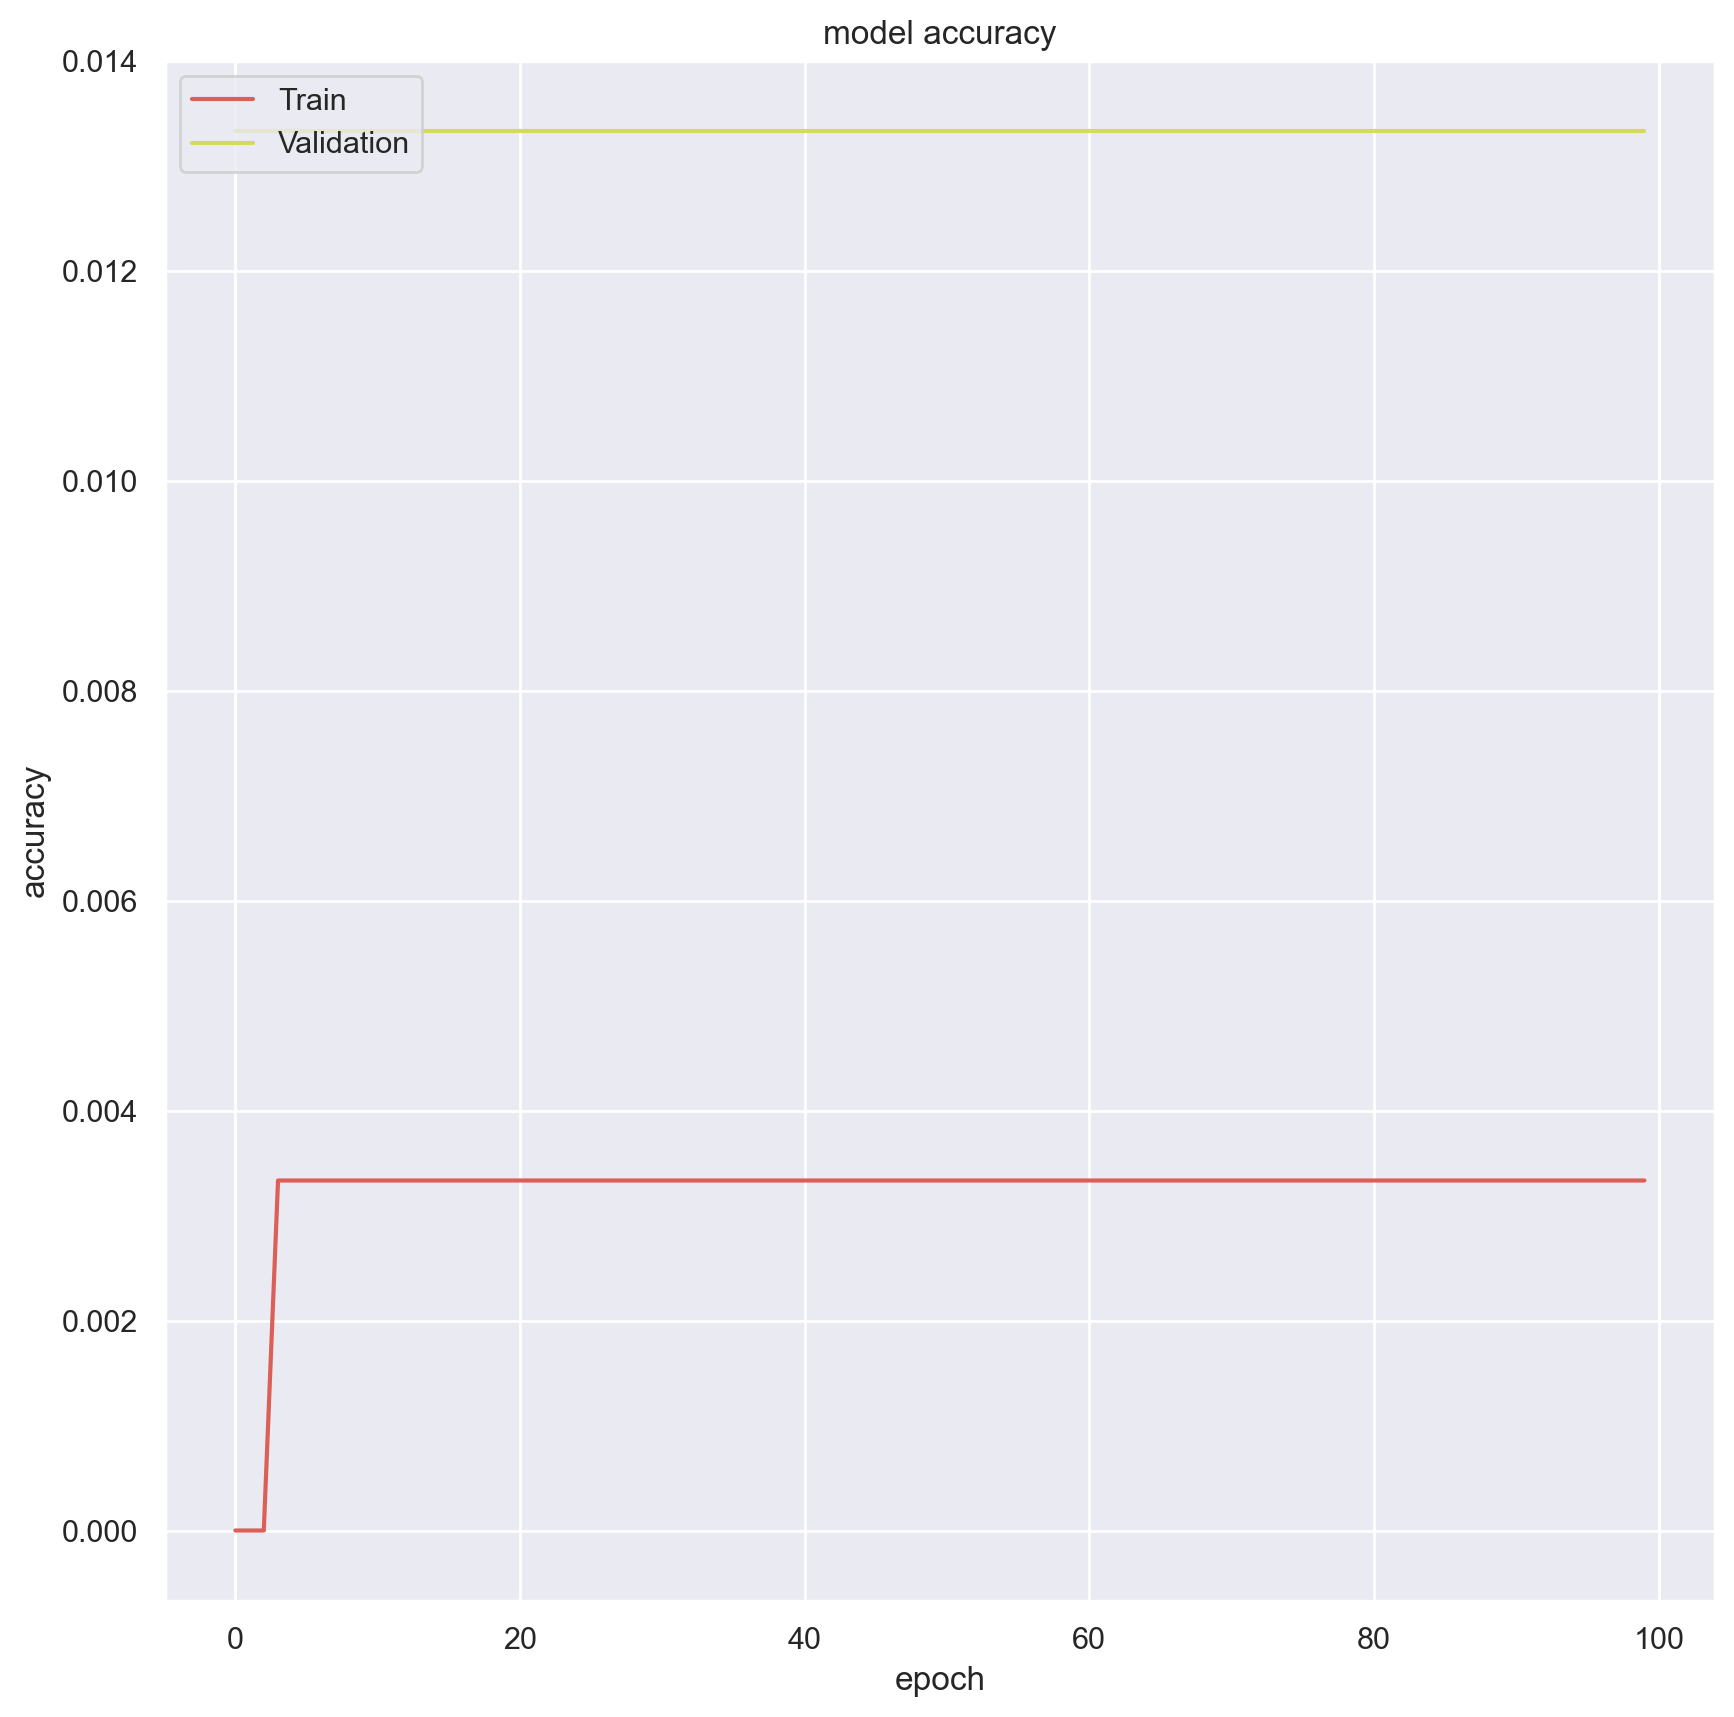

In [228]:
plt.figure(figsize=(10,10),dpi=200)
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [229]:
#Sağlanan bazı rastgele verilerle tahminler
X_random_sample = np.array([[1, 55, 65000, 11600, 562341]])
y_predict = model.predict(X_random_sample)

1/1 [==============================] - 0s 48ms/step


In [230]:
y_predict.shape

(1, 1)

In [231]:
print('Predicted Purchase Amount is =', y_predict[:,0])

Predicted Purchase Amount is = [95061.15]


In [232]:
car_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [233]:
car_df['net worth'].nunique()

500

In [234]:
def class_worth(nw):
    if nw < 100000:
        return 0
    elif 560000>nw>100000:
        return 1
    elif 800000>nw>560000:
        return 2
    else:
        return 3

In [235]:
car_df['class'] = car_df['net worth'].apply(class_worth)

In [236]:
car_df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,class
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,1
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,1
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,2
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,1
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,2


In [237]:
sb.set_style('darkgrid')

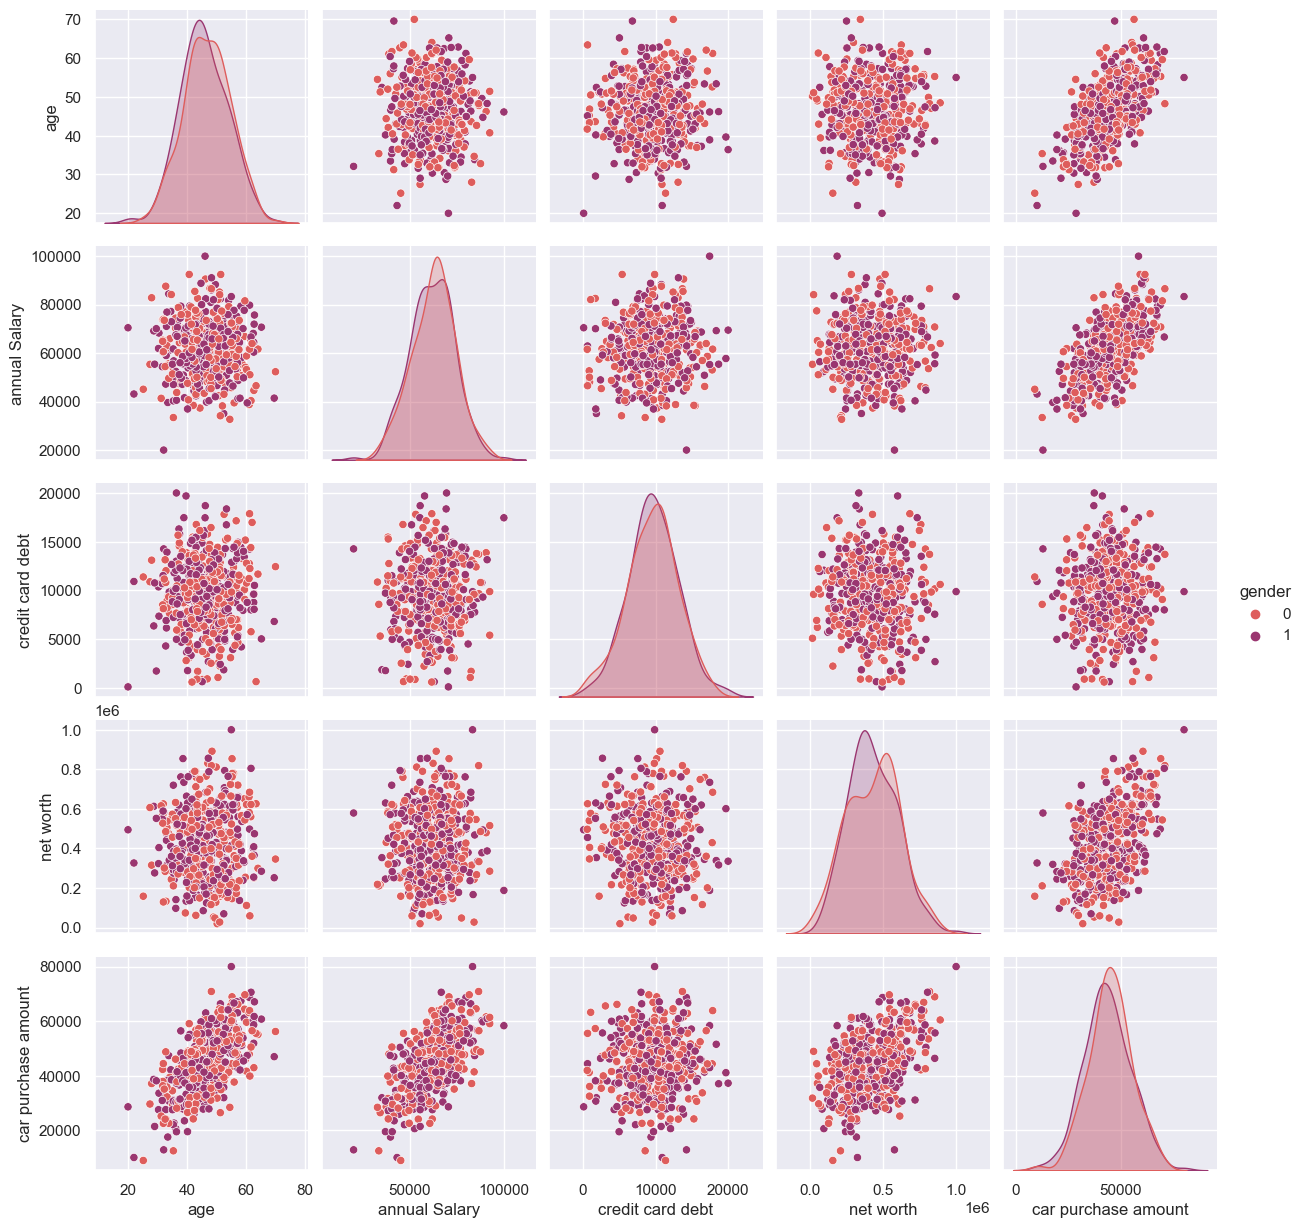

In [238]:
sb.pairplot(df,hue='gender',palette='flare')

Text(0.5, 1.0, 'Data Counts for each Country Spread')

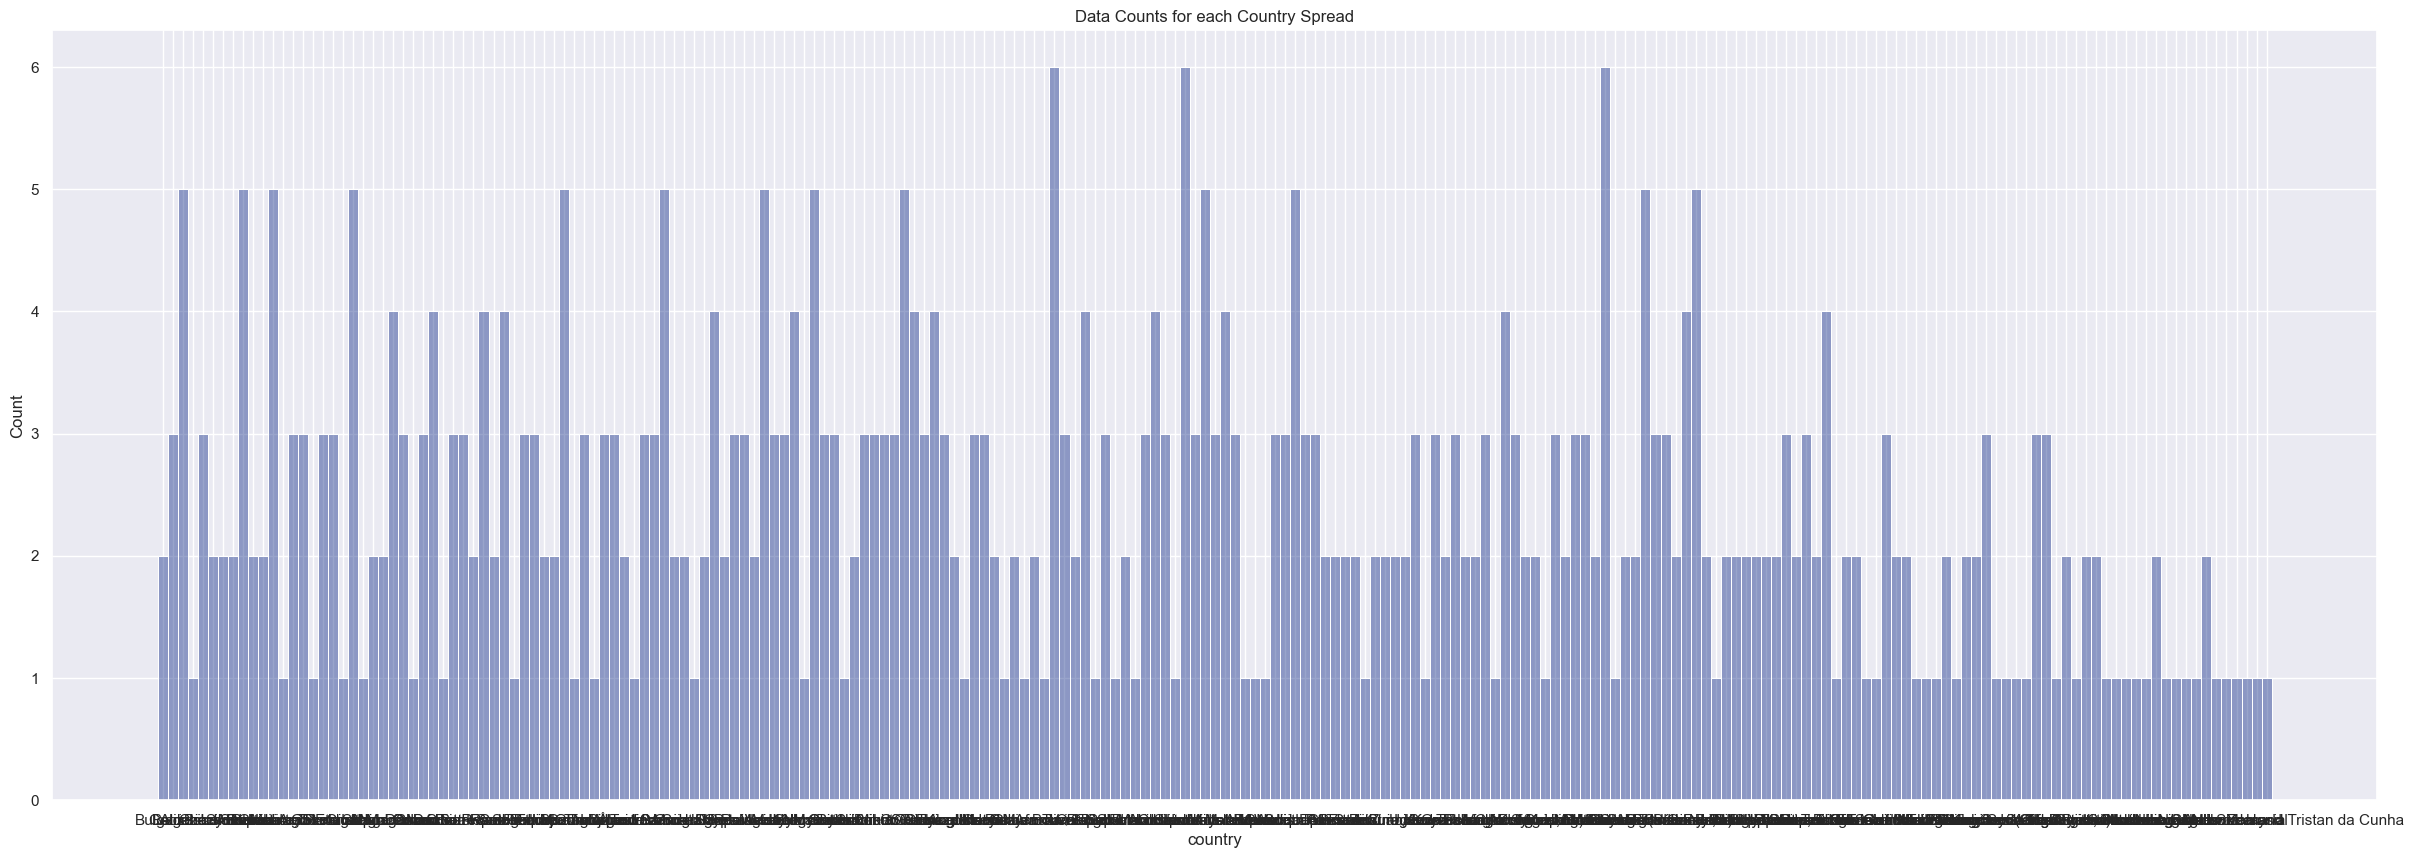

In [239]:
sb.set_palette('dark')
plt.figure(figsize=(30,10))
sb.histplot(df['country'],alpha=0.4)
plt.title('Data Counts for each Country Spread')

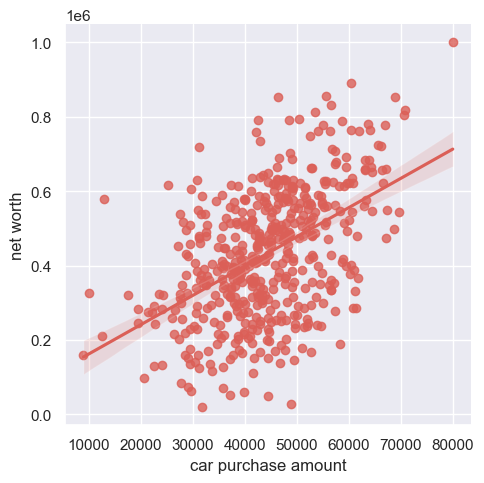

In [240]:
sb.set_palette('hls')
sb.lmplot(x='car purchase amount',y='net worth',data=df)

<Figure size 1000x2000 with 0 Axes>

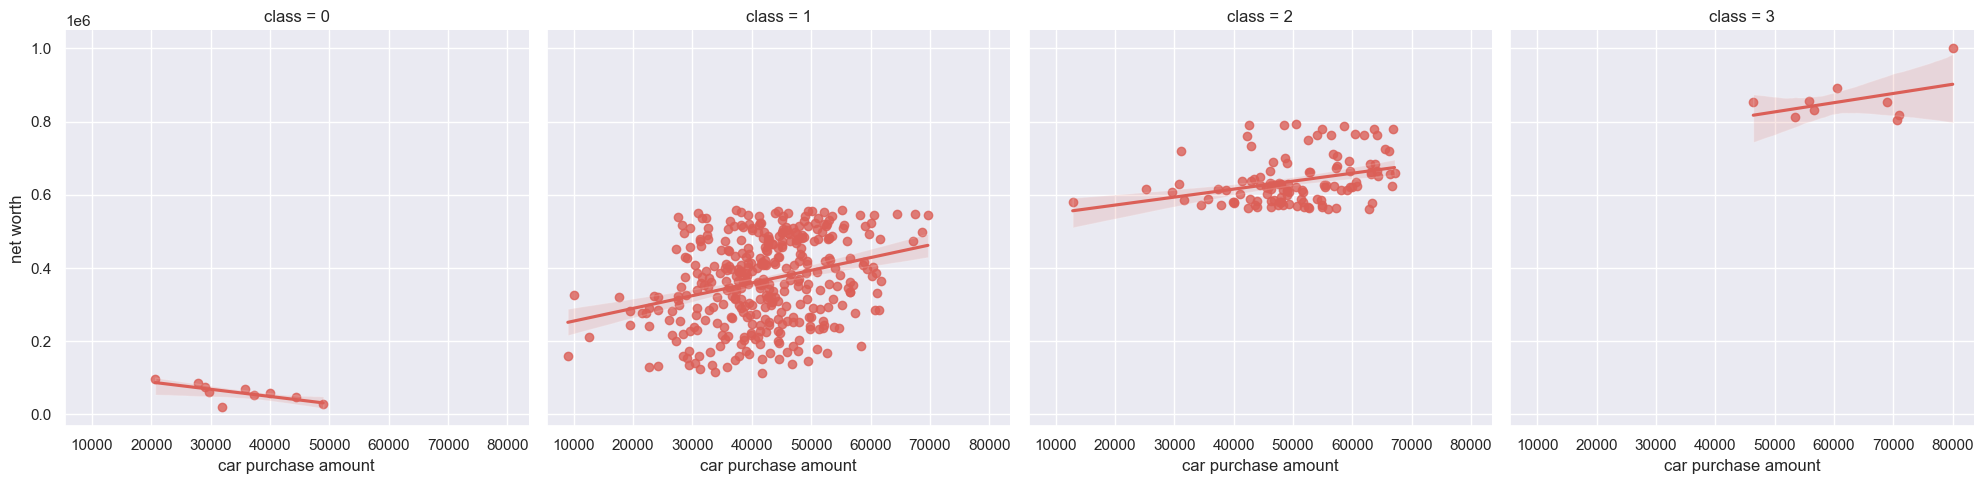

In [241]:
plt.figure(figsize=(10,20))
sb.lmplot(x='car purchase amount',y='net worth',data=car_df,col='class')

<AxesSubplot:xlabel='class', ylabel='credit card debt'>

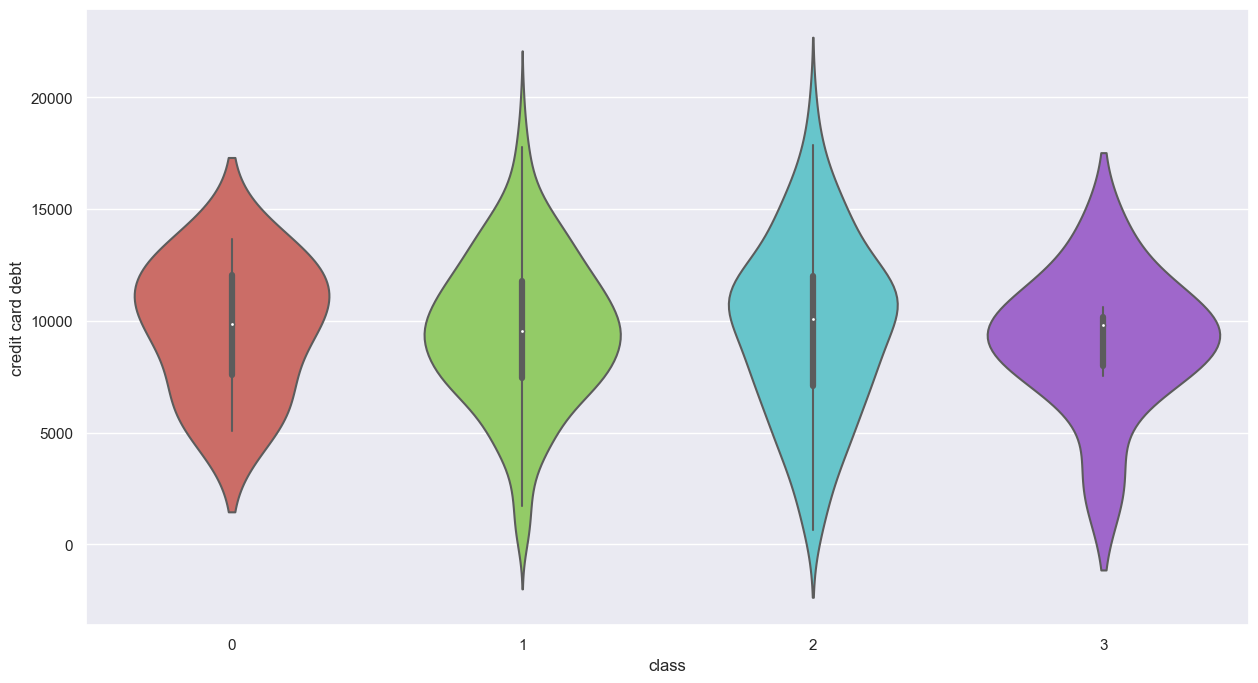

In [242]:
sb.violinplot(x='class',y='credit card debt',data=car_df,palette='hls')

Text(0.5, 1.0, 'Purchase Amount vs Age hue gender')

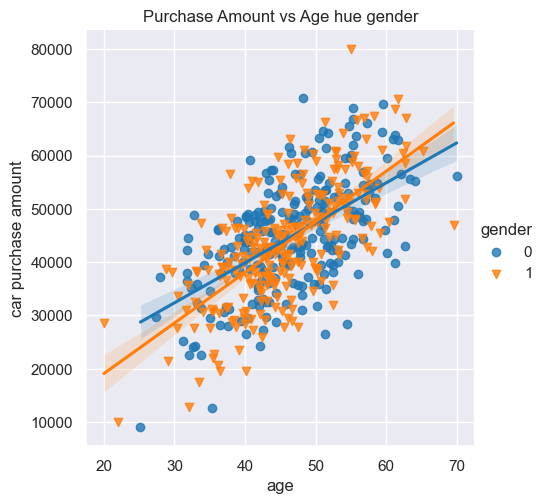

In [243]:
sb.lmplot(x='age',y='car purchase amount',data=df,hue='gender',markers=['o','v'],palette='tab10')
plt.title('Purchase Amount vs Age hue gender')

<AxesSubplot:xlabel='class', ylabel='net worth'>

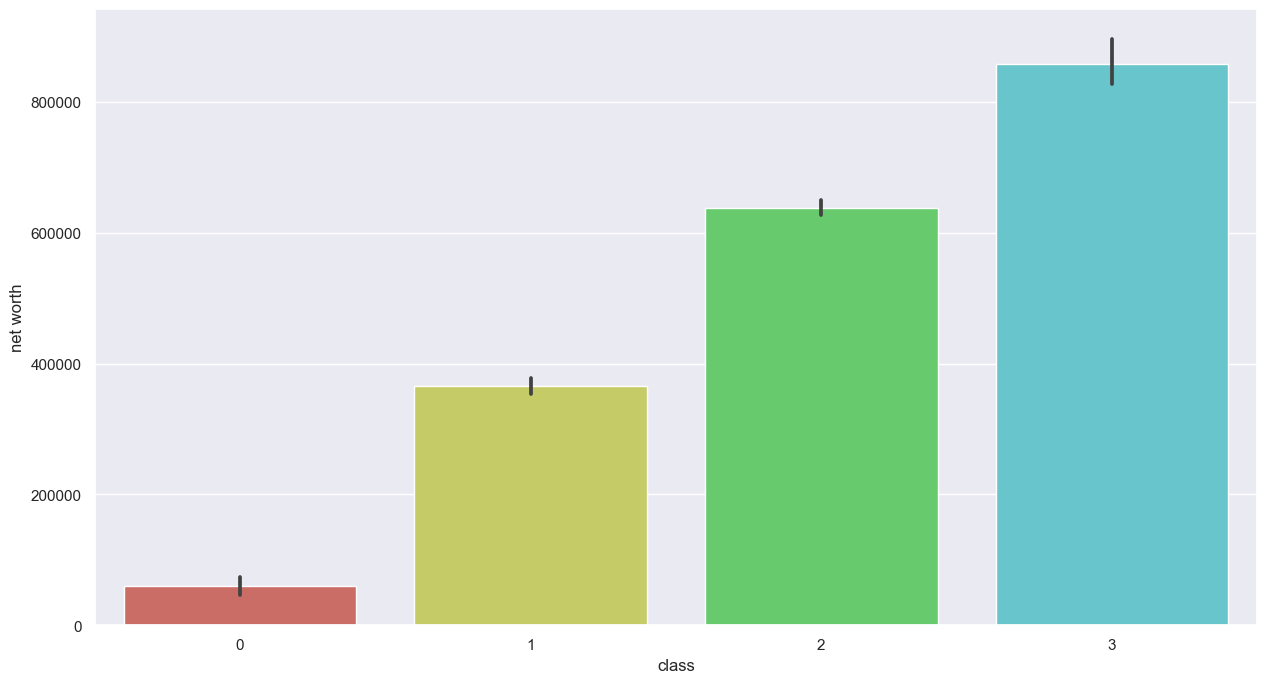

In [244]:
sb.barplot(x='class',y='net worth',data=car_df)

Text(0.5, 1.0, 'Salary vs Net Worth')

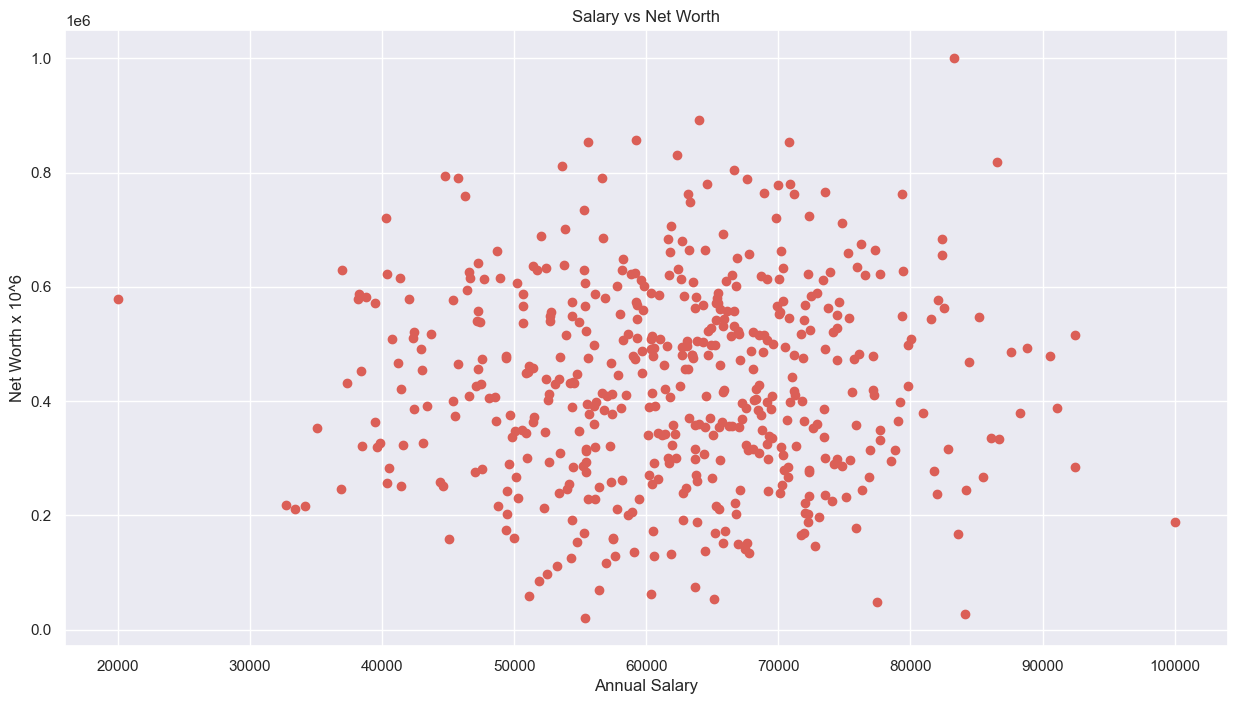

In [245]:
plt.scatter(df['annual Salary'],df['net worth'])
plt.xlabel('Annual Salary')
plt.ylabel('Net Worth x 10^6')
plt.title('Salary vs Net Worth')

Text(0.5, 1.0, 'Net Worth vs Age hue gender')

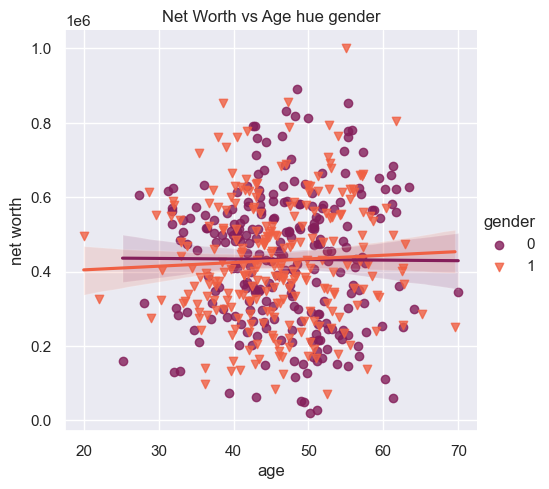

In [246]:
sb.lmplot(x='age',y='net worth',data=df,hue='gender',markers=['o','v'],palette='rocket')
plt.title('Net Worth vs Age hue gender')

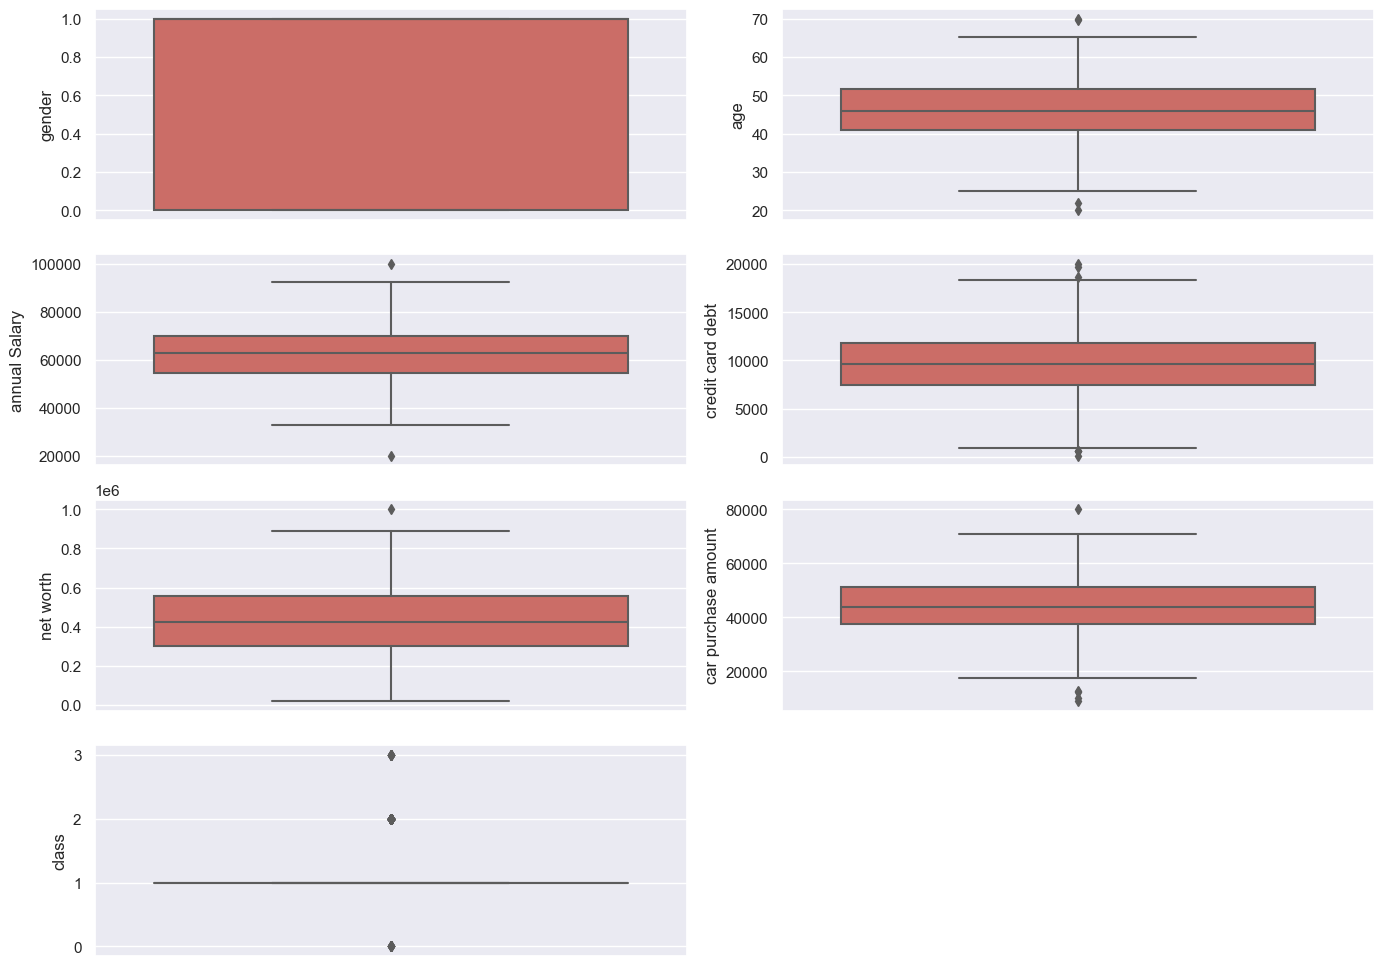

In [247]:
plt.figure(figsize=(14,27))
for i, col in enumerate(car_df.columns):
    axes = plt.subplot(11,2, i + 1)
    sb.boxplot(y=car_df[col])
plt.tight_layout()
plt.show()